In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from joblib import dump, load
import pickle
from torchvision import transforms
import shutil
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import graphviz 
from skimage import io
from skimage.transform import rescale, resize, downscale_local_mean
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import os
from os import listdir
import shutil
from scipy.stats import logistic
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, RepeatedKFold, StratifiedKFold, GridSearchCV, cross_val_score, train_test_split, TimeSeriesSplit

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from statsmodels.tsa.stattools import acf
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.datasets import load_wine
from scipy.stats import pearsonr, spearmanr
wine=load_wine()
import matplotlib.pyplot as plt

In [4]:
df=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])

In [5]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [6]:
df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


corr()

#Силна положителна корелация се наблюдава между  total_phenols и flavanoids total_phenols(0.86) и df.od280/od315_of_diluted_wines (0.78)

PearsonRResult(statistic=0.8645635000951147, pvalue=1.755838952586819e-54)


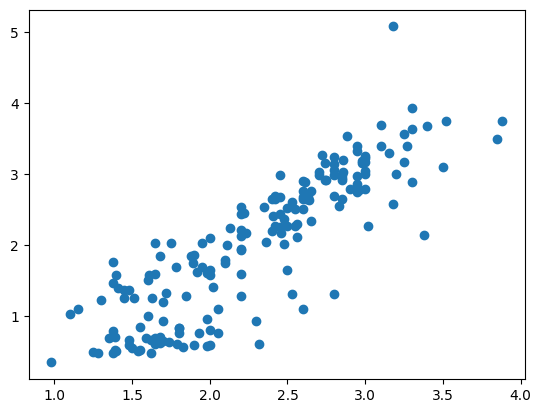

In [7]:
print(pearsonr(df.total_phenols, df.flavanoids))
plt.scatter(df.total_phenols, df.flavanoids)

In [8]:
df.drop(columns=['total_phenols'], axis=1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [ ]:
#Няма празни полета/стойности

In [9]:
(df.isnull() | df.empty | df.isna()).sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [10]:
df.target=df.target.astype('int64').astype('category')

In [11]:
freq=df['target'].value_counts()

<Axes: >

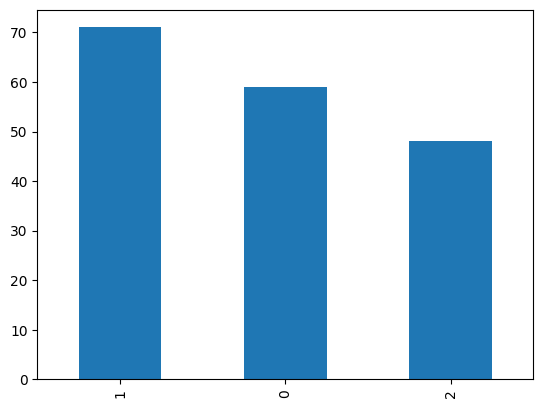

In [12]:
freq.plot(kind='bar')

In [13]:

print(df.shape)
#y=df['target']
#df=df.drop(columns=['target'], axis=1)

print(df.shape)
#print(y.shape)

(178, 14)
(178, 14)


In [14]:

from sklearn.model_selection import train_test_split  

In [15]:


x=df.drop(columns=['target'], axis=1)
y=df['target']

x=StandardScaler().fit_transform(df)



Number of components which account for 85% of the data variance is 6


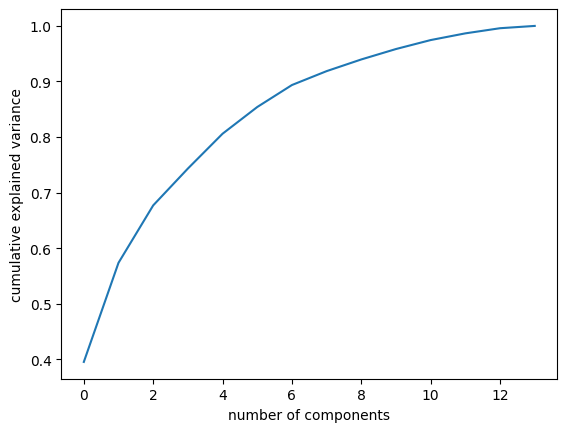

In [16]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
summ=0;
i = 0
summ=0;
while i < 768:
  summ += pca.explained_variance_ratio_[i]
  if summ>=0.85:
    break
  i += 1


print("Number of components which account for 85% of the data variance is " + str(i+1)  ) 

**моделът работи еднкаво добре и при n_components=2 и при n_components=6, затова използваме само две главни оси**

In [17]:
pca = PCA(n_components=2)
x=pca.fit_transform(x)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33,random_state=42)

In [ ]:
#pca = PCA(n_components=6)
#X_test = pca.fit_transform(X_test)
#X_train = pca.fit_transform(X_train)



In [19]:
params = {'criterion': ['gini', 'entropy'],
           'max_depth': [1, 2, 3, 4, 5], 
           'min_samples_leaf': [5, 10, 15, 20]}

In [20]:
grid_search_decision_tree = GridSearchCV(DecisionTreeClassifier(), params, cv=5)

In [21]:
grid_search_decision_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [5, 10, 15, 20]})

In [22]:
grid_search_decision_tree.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)

In [23]:
best_decision_tree = grid_search_decision_tree.best_estimator_

In [24]:
best_decision_tree.score(X_train, y_train)

0.957983193277311

In [25]:
s = pickle.dumps(best_decision_tree)

text_file = open("decision_tree.ml", "wb")
n = text_file.write(s)
text_file.close()
best_decision_tree1 = load('decision_tree.ml')


In [26]:
best_decision_tree1.score(X_train, y_train)

0.957983193277311

In [27]:
confusion_matrix(best_decision_tree.predict(X_test), y_test)

array([[19,  1,  0],
       [ 1, 23,  0],
       [ 0,  0, 15]])

In [28]:
best_decision_tree.score(X_test, y_test)

0.9661016949152542

In [29]:
xgb_model = xgb.XGBClassifier()
cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

In [30]:

parameters = {
              'objective':['reg:squarederror'],
              'learning_rate': [0.05], 
              'max_depth': [30],
              #'min_child_weight': [1,2,10],
              #'silent': [1],
              #'subsample': [0.7,0.8,1],
              'colsample_bytree': [0.9],
              'n_estimators': [1000],
              #'missing':[0],
              #'alpha':['0','2','40'],
              #'lambda':['0','0.8','2'],
              'seed': [42]}

In [31]:
grid_search = GridSearchCV(xgb_model, parameters , scoring='f1',cv=cv)

In [32]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "/usr/local/l

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.9], 'learning_rate': [0.05],
                         'max_depth': [30], 'n_estimators': [1000],
                         'objective': ['reg:squarederror'], 'seed': [42]},
             scoring='f1')

In [33]:
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [34]:
best_model = grid_search.best_estimator_

In [35]:

y_pred = grid_search.best_estimator_.predict(X_test) 
print('The F1 score of the best XGBOOST model is ',f1_score(y_test, y_pred, pos_label='positive',average='micro'))
print('The Accuracy of the best XGBOOST model is ',grid_search.best_estimator_.score(X_test, y_test))

The F1 score of the best XGBOOST model is  0.9661016949152542
The Accuracy of the best XGBOOST model is  0.9661016949152542


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:

#y_pred

In [ ]:
#y_train

In [ ]:
y_train.shape

(119,)